In [13]:
import sklearn
import numpy as np

pos = np.load('pic_data/pos.npy')
pos_filename = np.load('pic_data/pos_filename.npy', allow_pickle=True)
neg = np.load('pic_data/neg.npy')
neg_filename = np.load('pic_data/neg_filename.npy', allow_pickle=True)

train_set = sklearn.utils.Bunch()
train_set.data = np.concatenate((pos,neg))
train_set.target = np.array([1]*len(pos)+[0]*len(neg))
train_set.target_names = ['neg', 'pos']
train_set.filename = np.concatenate((pos_filename,neg_filename))

In [14]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import learning_curve
clf = MLPClassifier(random_state=1, max_iter=300)
train_sizes,train_scores,test_scores,fit_times,score_times = learning_curve(clf,train_set.data, train_set.target, n_jobs=12, return_times=True)
clf.fit(train_set.data, train_set.target)

MLPClassifier(max_iter=300, random_state=1)

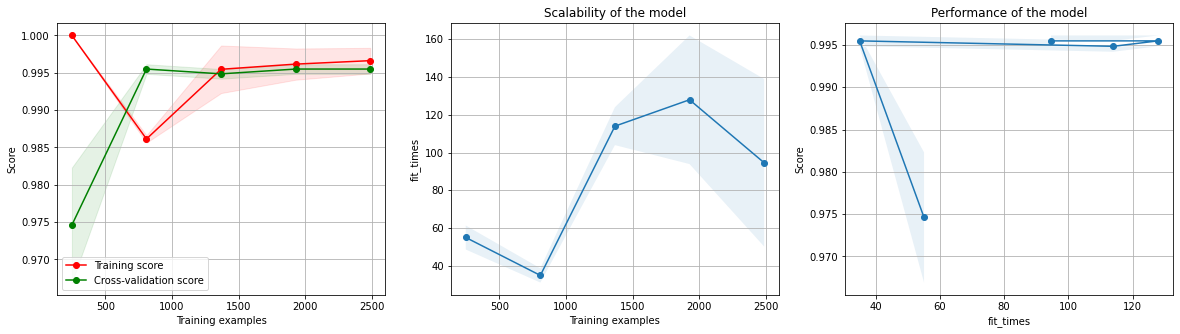

In [15]:
import matplotlib.pyplot as plt
_, axes = plt.subplots(1, 3, figsize=(20, 5))

axes[0].set_xlabel("Training examples")
axes[0].set_ylabel("Score")
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
fit_times_mean = np.mean(fit_times, axis=1)
fit_times_std = np.std(fit_times, axis=1)
# Plot learning curve
axes[0].grid()
axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1,
                     color="g")
axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
axes[0].legend(loc="best")

# Plot n_samples vs fit_times
axes[1].grid()
axes[1].plot(train_sizes, fit_times_mean, 'o-')
axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                     fit_times_mean + fit_times_std, alpha=0.1)
axes[1].set_xlabel("Training examples")
axes[1].set_ylabel("fit_times")
axes[1].set_title("Scalability of the model")

# Plot fit_time vs score
axes[2].grid()
axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1)
axes[2].set_xlabel("fit_times")
axes[2].set_ylabel("Score")
axes[2].set_title("Performance of the model")

plt.show()
_.savefig('MLP.svg',dpi=600)

In [16]:
import pandas as pd

train_proba = clf.predict_proba(train_set.data)
pd.DataFrame(train_proba,index=train_set.filename,columns=train_set.target_names).to_csv('result/pic_MLP_embedding.csv', float_format='%.16f')

sum_file = pd.read_csv('result/sum_train.csv', index_col=0)
for i,p in enumerate(train_set.filename):
    sum_file.loc[p,'mlp_pos'] = train_proba[i, 1]
sum_file.to_csv('result/sum_train.csv', float_format='%.16f')

In [17]:
test = np.load('pic_data/test.npy')
test_filename = np.load('pic_data/test_filename.npy',allow_pickle=True)
test_set = sklearn.utils.Bunch()
test_set.data = test
test_set.filename = test_filename

In [18]:
pred_proba = clf.predict_proba(test_set.data)
pd.DataFrame(pred_proba,index=test_set.filename).to_csv('result/pic_MLP_result.csv', float_format='%.16f')

sum_file = pd.read_csv('result/sum_test.csv', index_col=0)
for i,p in enumerate(test_set.filename):
    sum_file.loc[p,'mlp_pos'] = pred_proba[i, 1]
sum_file.to_csv('result/sum_test.csv', float_format='%.16f')